# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
## 常見的 optimizer 包含
SGD<br />
RMSprop<br />
AdaGrad<br />
Adam<br />

In [3]:
import os
import keras
import warnings 

warnings.filterwarnings('ignore')
#os.environ["CUDA_VISIBLE_DEVICES"] = ""
!nvidia-smi

Using TensorFlow backend.


Tue Jul 16 12:25:46 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
def preproc_x(x, flatten = True):
  x = x / 255.0
  if flatten:
    x = x.reshape((len(x),-1))
  return x

def preproc_y(y, num_classes = 10):
  if y.shape[-1] == 1:
    y = keras.utils.to_categorical(y, num_classes)
  return y

In [0]:
x_train = preproc_x(x_train, False)
y_train = preproc_y(y_train)

x_test = preproc_x(x_test, False)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(input_shape, output_units = 10):
  
  input_layer = keras.layers.Input(input_shape, name = "main_input")
  
  x = keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(input_layer)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D(pool_size = (2,2))(x)
  x = keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPooling2D(pool_size = (2,2))(x)
  x = keras.layers.Dropout(0.25)(x)
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dense(units = 512, activation = 'relu')(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(units = 256, activation = 'relu')(x)
  x = keras.layers.Dropout(0.2)(x)
  x = keras.layers.Dense(units = 128, activation = 'relu')(x)
  
  output_layer = keras.layers.Dense(units = output_units, activation = 'softmax', name = "main_output")(x)
  
  model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
  return model

In [0]:
lrs = [1e-1, 5e-2, 1e-2, 1e-3]
opts = ['SGD', 'RMSprop', 'Adagrad', 'Adam']
epochs = 20
batch_size = 128

In [9]:
results = {}

for lr in lrs:
  for opt in opts:
    print(f"{opt} optimizer with {lr} learning rate")
    
    model = build_mlp(x_train.shape[1:])
    
    optimizer = None
    
    if opt == 'SGD':
      optimizer = keras.optimizers.SGD(lr = lr, momentum = 0.9, nesterov = True)
    elif opt == 'RMSprop':
      optimizer = keras.optimizers.RMSprop(lr = lr)
    elif opt == 'Adagrad':
      optimizer = keras.optimizers.Adagrad(lr = lr)
    else :
      optimizer = keras.optimizers.Adam(lr = lr, beta_1 = 0.9, beta_2 = 0.999)
    
    model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
    
    history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, shuffle = True, validation_data = [x_test, y_test])
    
    name_tag = f"{str(opt)}_{str(lr)}"
    results[name_tag] = {'train_loss' : history.history['loss'],
                         'valid_loss' : history.history['val_loss'],
                         'train_acc'  : history.history['acc'],
                         'valid_acc'  : history.history['val_acc'] }




W0716 12:26:04.389005 140327993546624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 12:26:04.446233 140327993546624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 12:26:04.448597 140327993546624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 12:26:04.505348 140327993546624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0716 12:26:04.508712 1403279935

SGD optimizer with 0.1 learning rate


W0716 12:26:07.766352 140327993546624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0716 12:26:07.969993 140327993546624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0716 12:26:08.270948 140327993546624 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0716 12:26:08.402061 140327993546624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: Th

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 24s 482us/step - loss: 1.6122 - acc: 0.4205 - val_loss: 1.3554 - val_acc: 0.5196
Epoch 2/20
50000/50000 [==============================] - 20s 393us/step - loss: 1.1987 - acc: 0.5783 - val_loss: 1.1475 - val_acc: 0.5980
Epoch 3/20
50000/50000 [==============================] - 20s 394us/step - loss: 0.9984 - acc: 0.6575 - val_loss: 0.9550 - val_acc: 0.6697
Epoch 4/20
50000/50000 [==============================] - 20s 396us/step - loss: 0.8750 - acc: 0.7030 - val_loss: 0.9401 - val_acc: 0.6943
Epoch 5/20
50000/50000 [==============================] - 20s 395us/step - loss: 0.8021 - acc: 0.7277 - val_loss: 0.8852 - val_acc: 0.7022
Epoch 6/20
50000/50000 [==============================] - 20s 396us/step - loss: 0.7358 - acc: 0.7552 - val_loss: 0.8559 - val_acc: 0.7176
Epoch 7/20
50000/50000 [==============================] - 20s 397us/step - loss: 0.6868 - acc: 0.7711 - val_loss: 0.

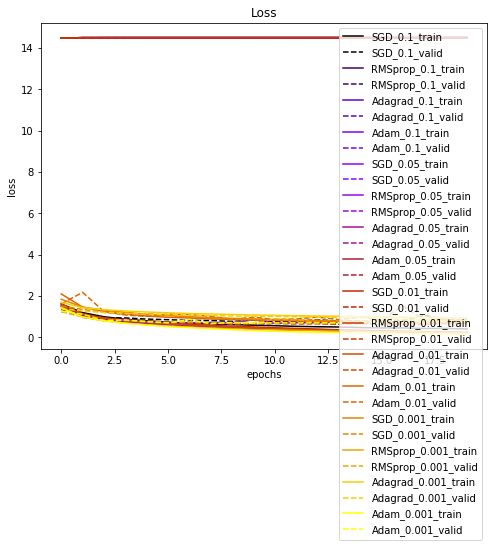

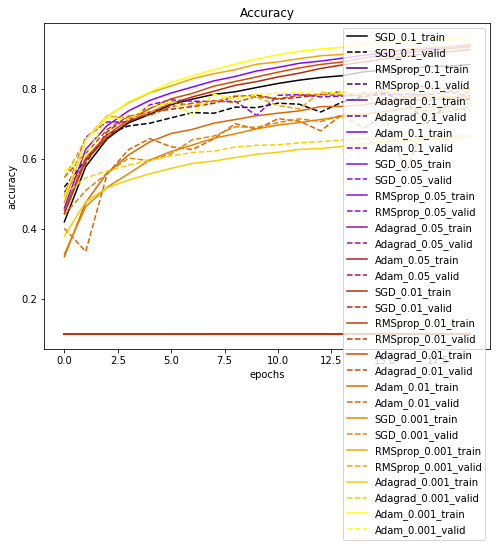

In [19]:
import matplotlib.pyplot as plt
import numpy as np
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, len(results))]

plt.figure(figsize = (8,6))

for i, cond in enumerate(results.keys()):
  plt.plot(results[cond]['train_loss'], '-', label = cond + "_train", color = colors[i])
  plt.plot(results[cond]['valid_loss'],'--', label = cond + "_valid", color = colors[i])

plt.xlabel("epochs")
plt.ylabel('loss')
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
  plt.plot(results[cond]['train_acc'], '-', label = cond + "_train", color = colors[i])
  plt.plot(results[cond]['valid_acc'], '--',label = cond + "_valid", color = colors[i])

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()